## Variable distributions and their effects on Models

Reference 
[https://www.statisticssolutions.com/homoscedasticity/]

### Linear Regression Assumptions

- Linear relationship with the outcome Y
- Homoscedasticity
- Normality
- No Multicollinearity 

## Linear Assumption

- The X variable is linearly related to the dataset 
- Pearson correlation coefficient can determine the linearity magnitude  between variables 

## Normality Assumption

- The variable X follows a normal or gaussian distribution

## Homoscedasticity Assumption

- Homogeneity of variance

- Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables


### Unaffected models

- Neural Networks
- Support Vector Machines
- Trees



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()
import pandas as pd



In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [157]:
dataset.data.shape

(506, 13)

In [158]:
dataset.target.shape

(506,)

In [0]:
X = dataset.data
y = dataset.target

In [0]:
def residual_plot(y_pred, y_test, X):
  y_res = (y_test.reshape(-1) - y_pred.reshape(-1))
  # y_res = (y_test.reshape(-1) - y_pred.reshape(-1))**2
  # y_res = np.sqrt(y_res)
  for i in range(X.shape[1]):
    plt.figure()
    sns.residplot(x = y_res, y = X[:,i], lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
    plt.xlabel("Fitted values " + str(i))
    plt.xticks([])
    plt.title('Residual plot')

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [162]:
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(data_processed,
                                                    y,
                                                    test_size=0.2)

X_train_processed.shape, X_test_processed.shape,  y_train_processed.shape, y_test_processed.shape

((404, 13), (102, 13), (404,), (102,))

In [0]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

In [0]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train_processed = obj.fit_transform(X_train_processed)
X_test_processed = obj.transform(X_test_processed)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

21.579803921568626
19.964411764705883


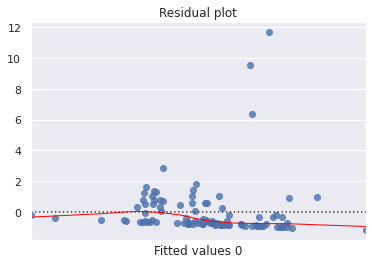

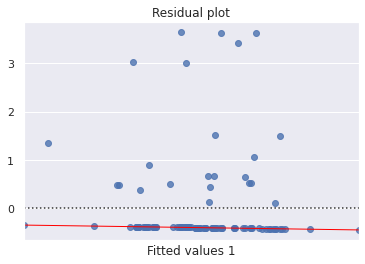

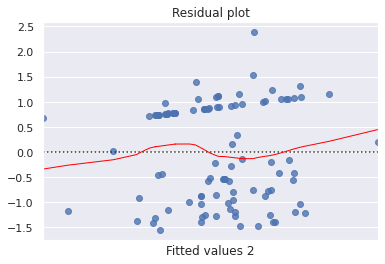

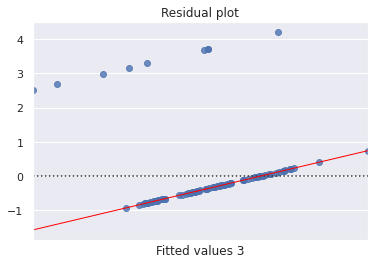

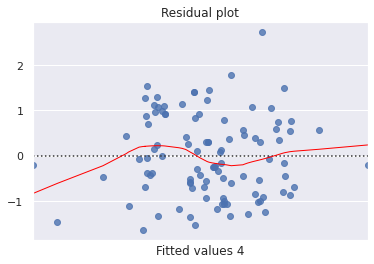

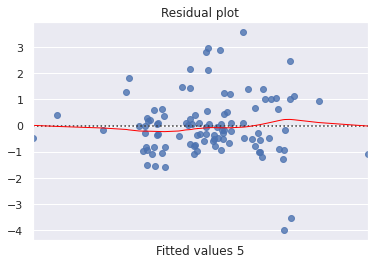

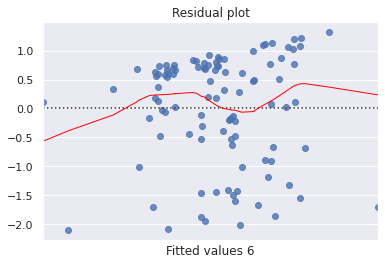

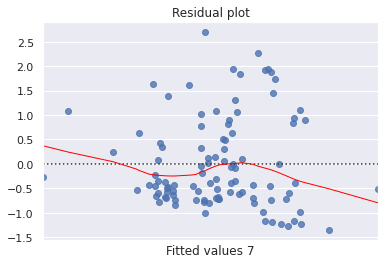

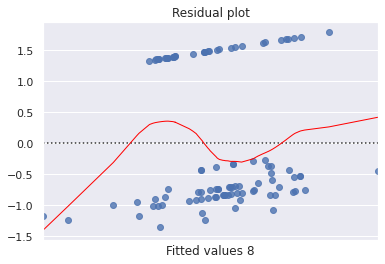

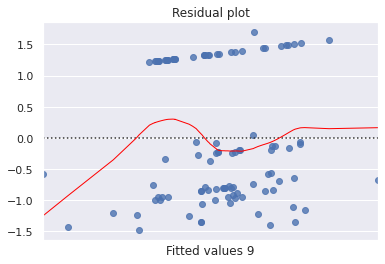

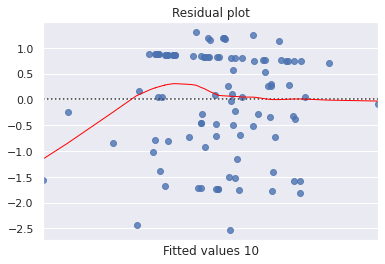

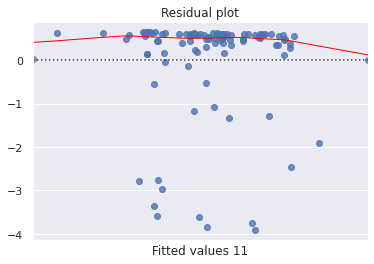

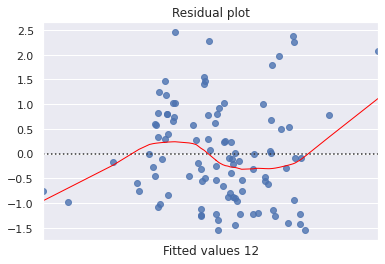

In [166]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))


residual_plot(y_pred, y_test, X_test)

21.081764705882353
19.297745098039222


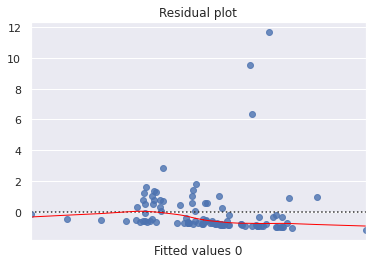

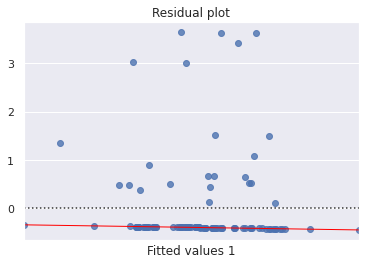

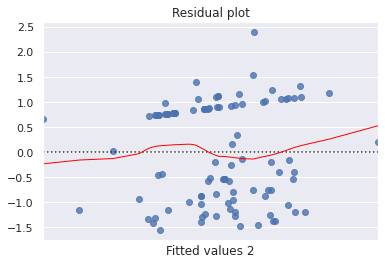

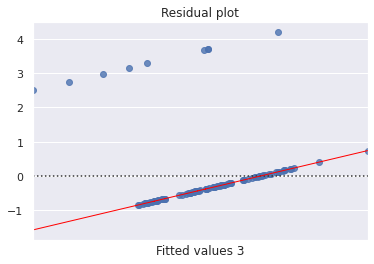

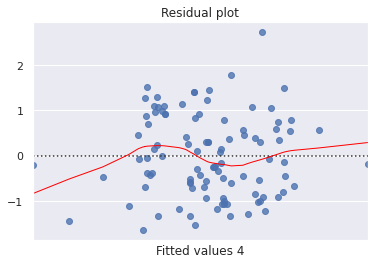

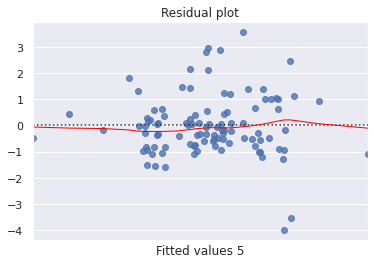

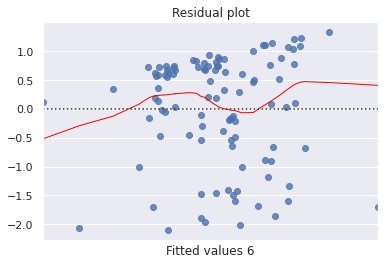

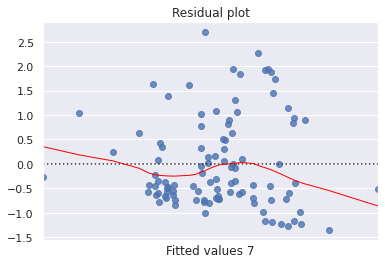

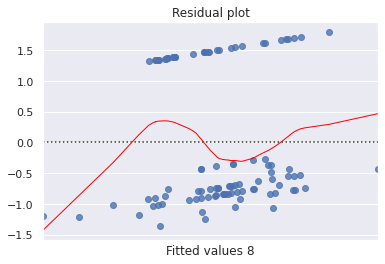

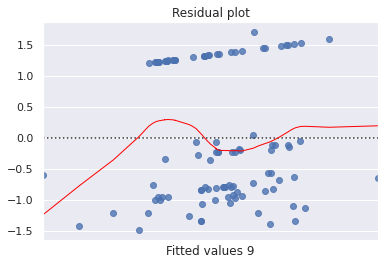

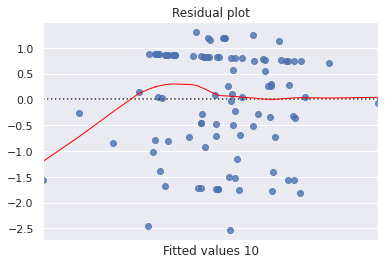

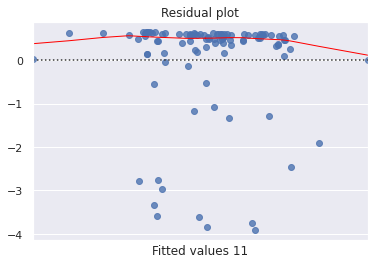

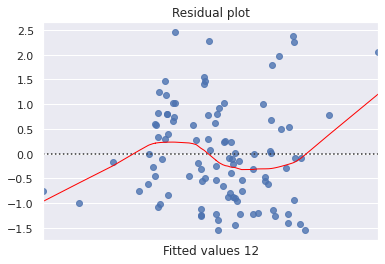

In [167]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

21.081764705882353
19.297745098039222


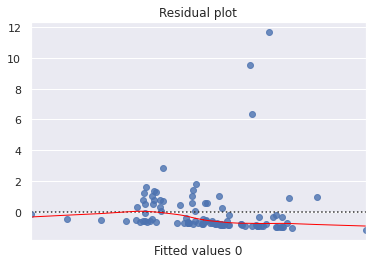

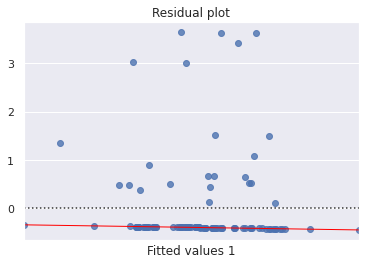

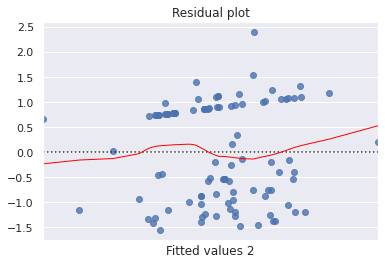

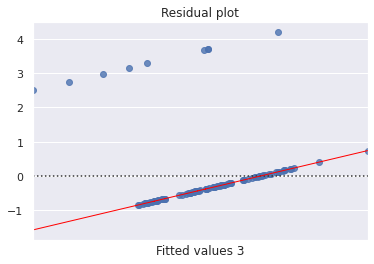

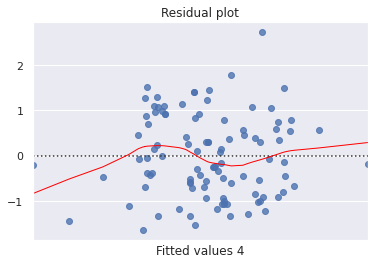

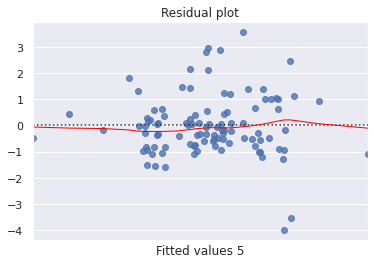

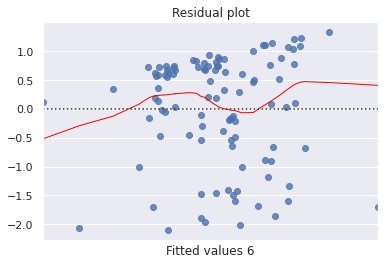

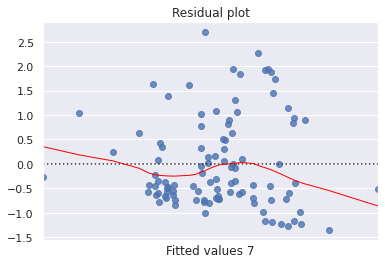

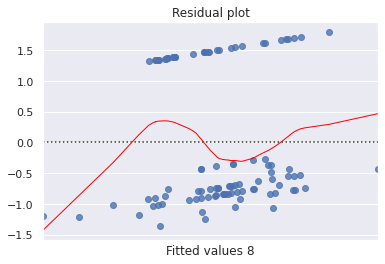

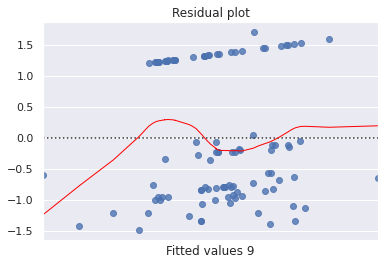

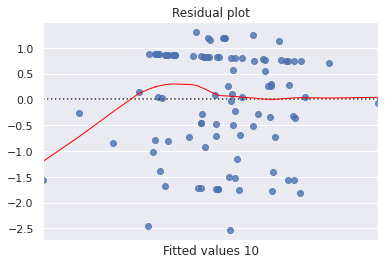

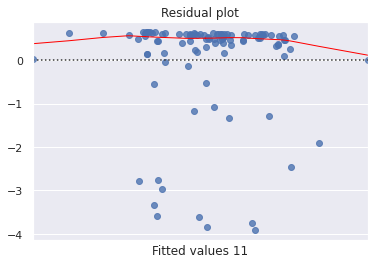

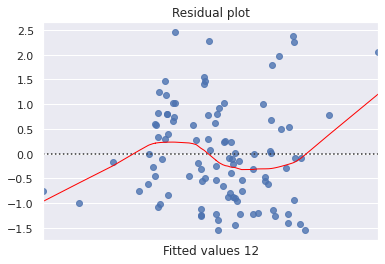

In [168]:
from sklearn.linear_model import Ridge
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))
residual_plot(y_pred, y_test, X_test)


25.0621568627451
13.297745098039217


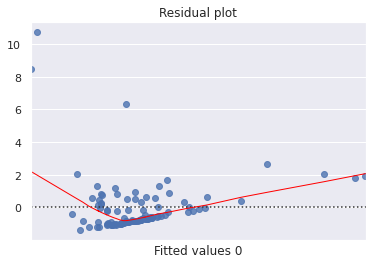

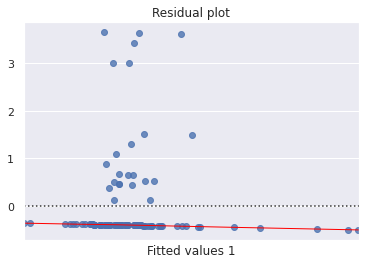

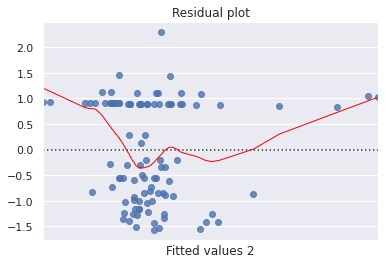

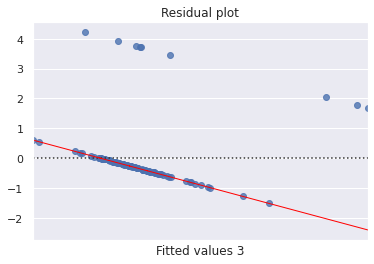

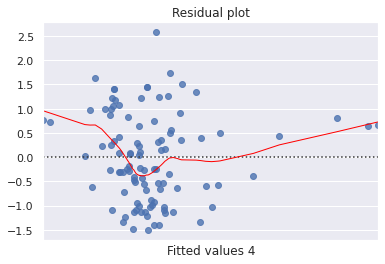

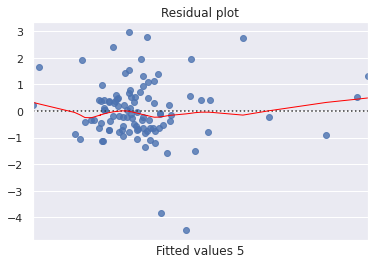

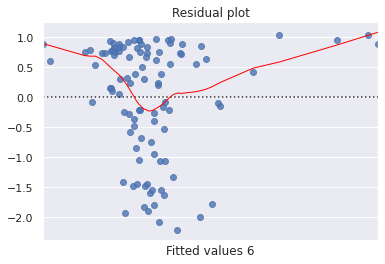

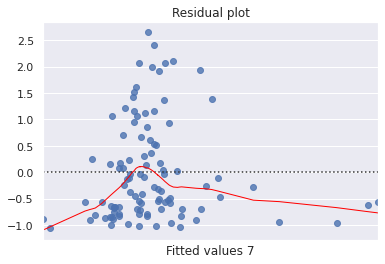

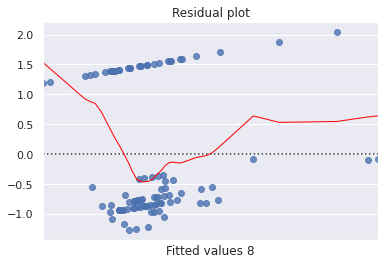

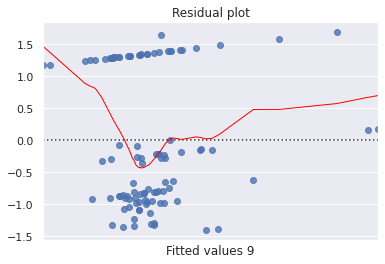

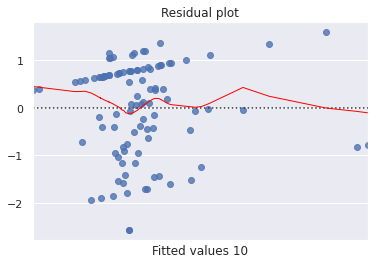

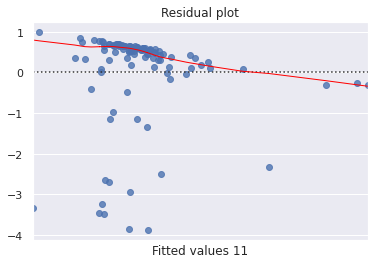

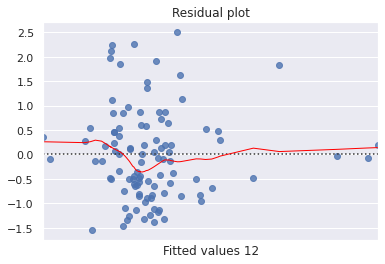

In [169]:
from sklearn.svm import SVR
model = SVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

22.754313725490192
11.15852941176471


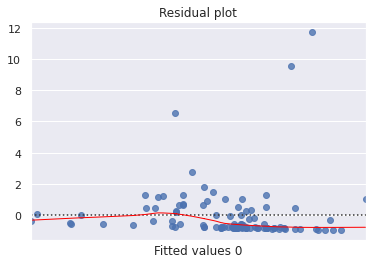

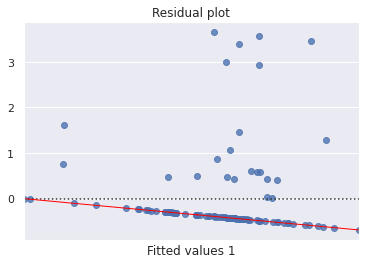

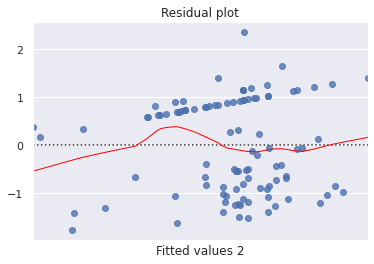

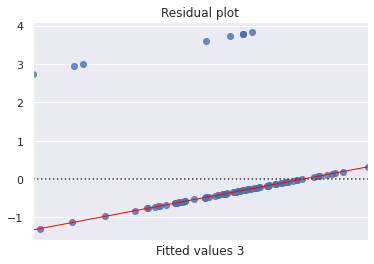

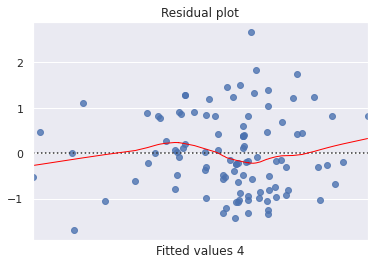

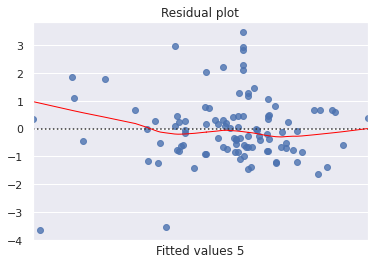

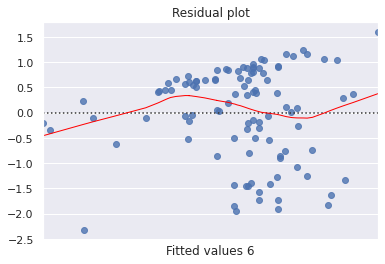

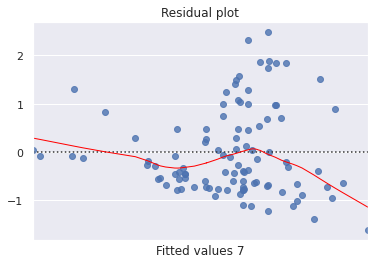

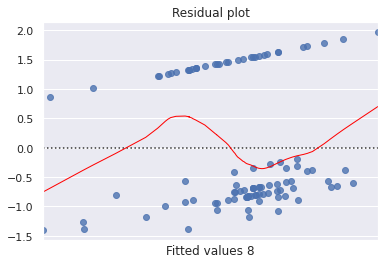

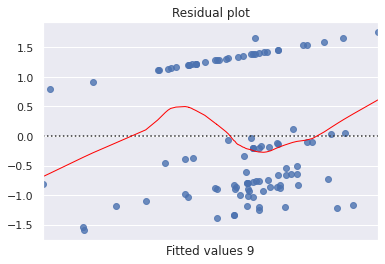

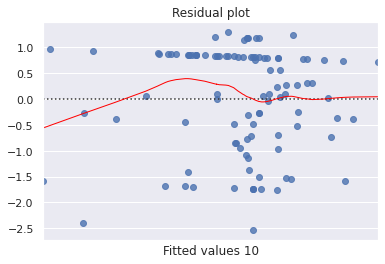

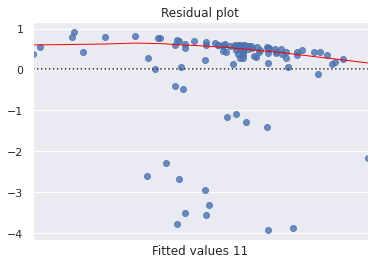

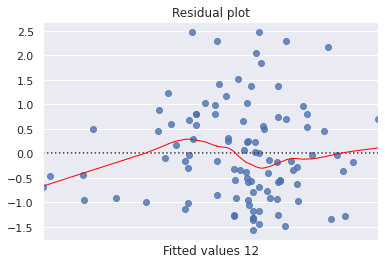

In [170]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


23.448431372549017
17.88401960784314


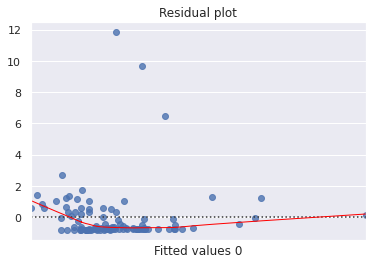

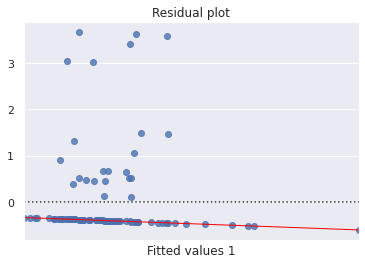

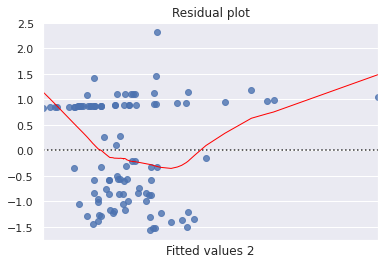

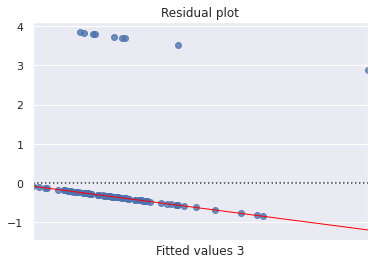

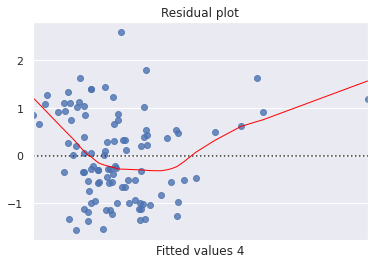

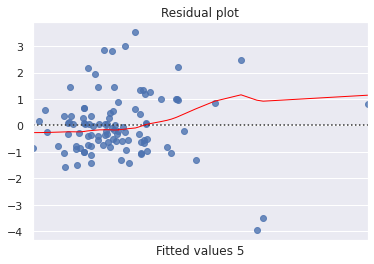

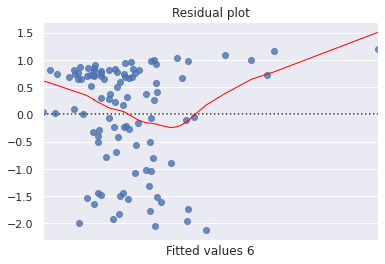

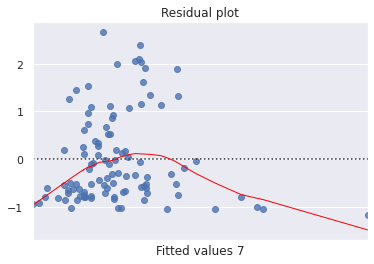

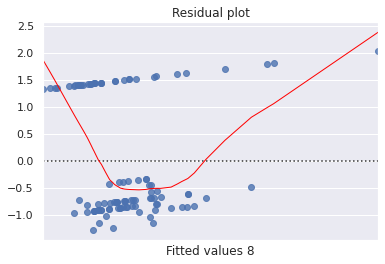

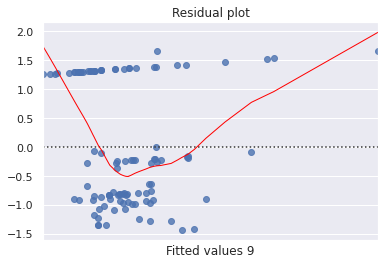

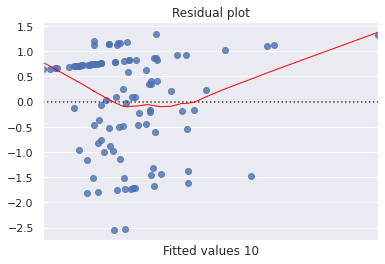

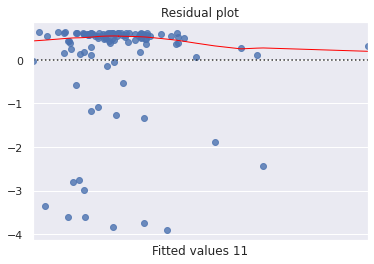

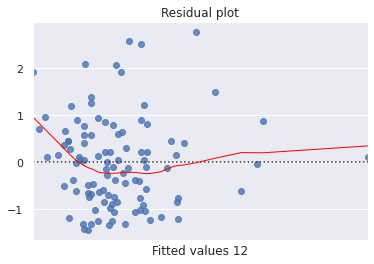

In [171]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

15.244509803921572
17.458529411764705


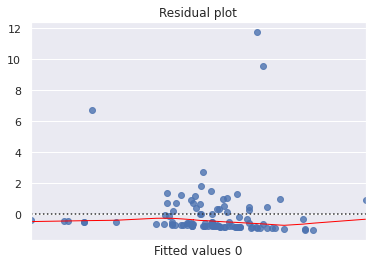

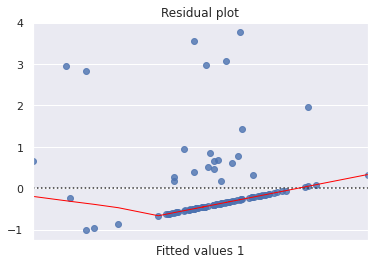

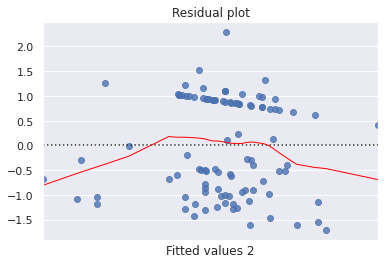

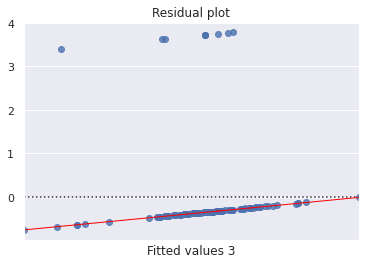

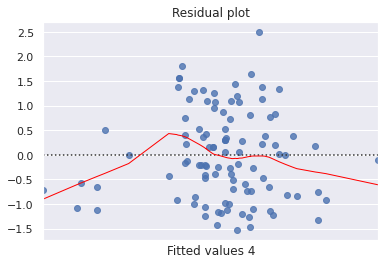

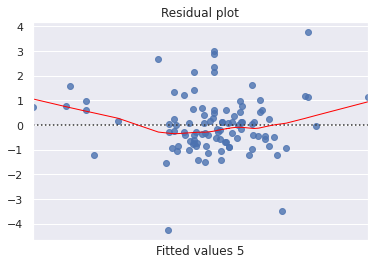

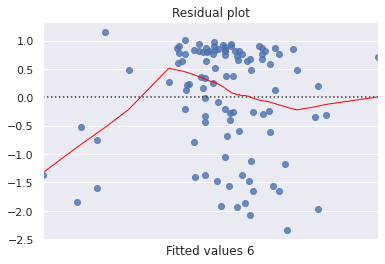

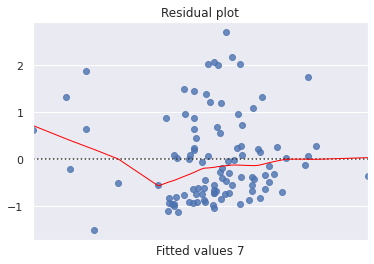

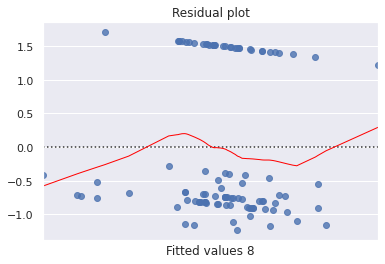

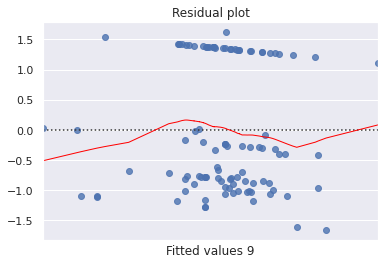

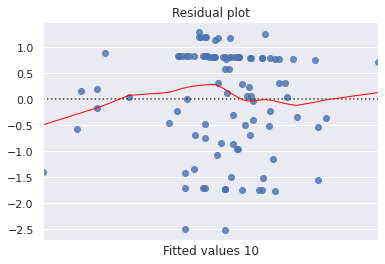

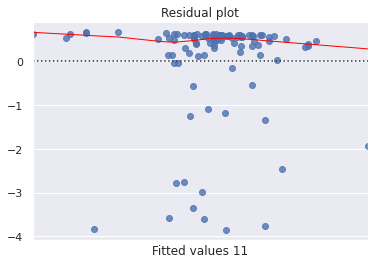

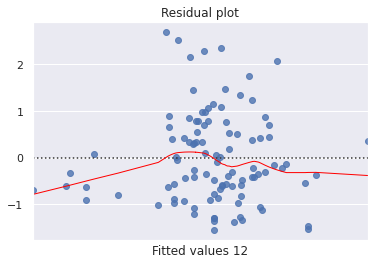

In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

15.758235294117647
36.50950980392157


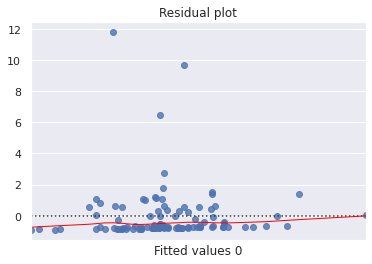

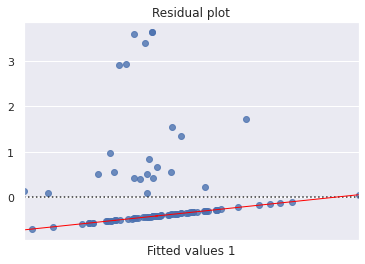

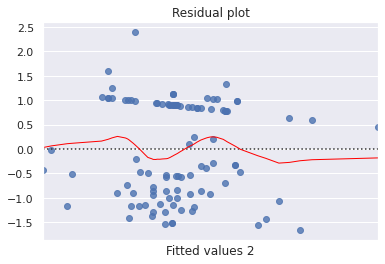

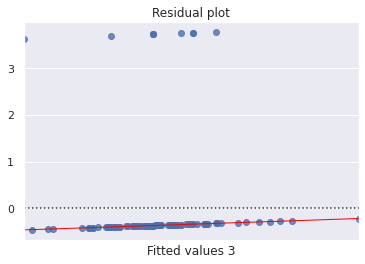

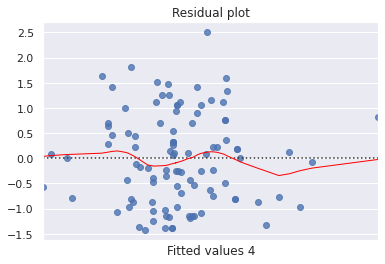

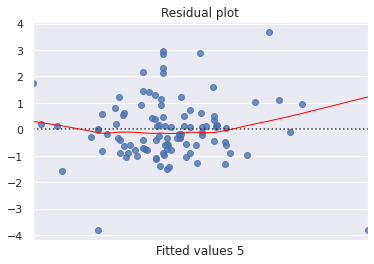

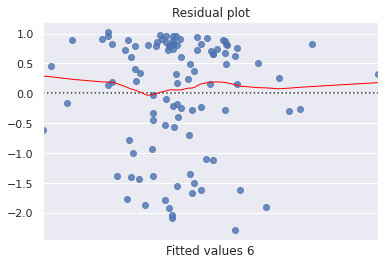

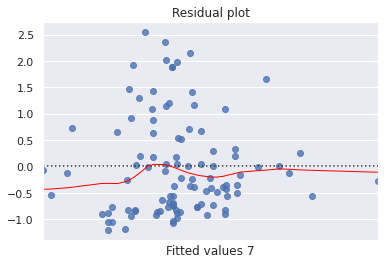

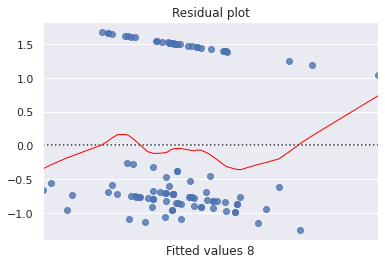

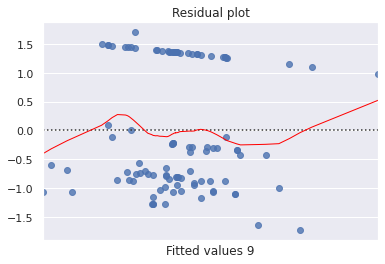

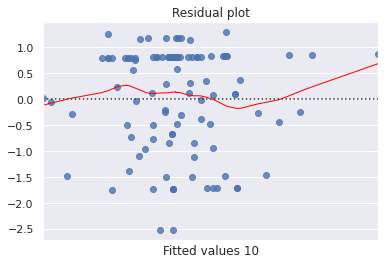

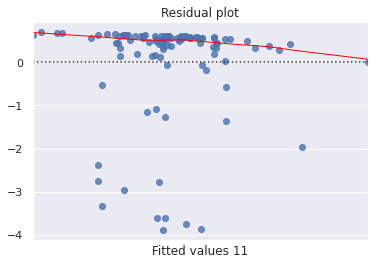

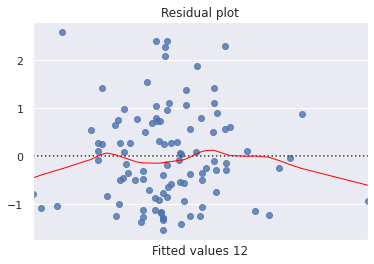

In [173]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

residual_plot(y_pred, y_test, X_test)

20.697450980392155
19.913431372549024


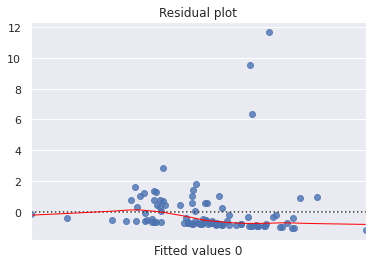

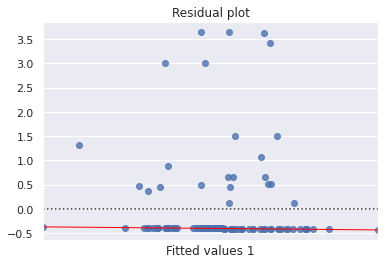

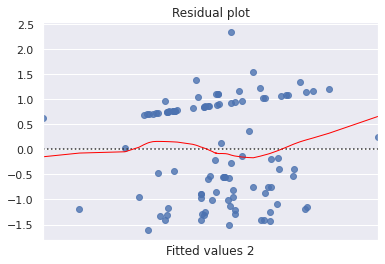

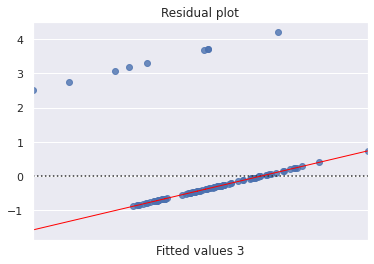

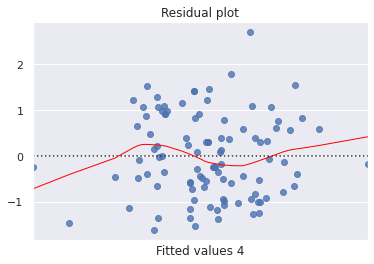

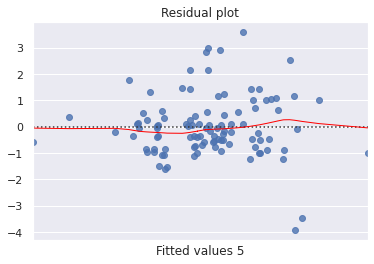

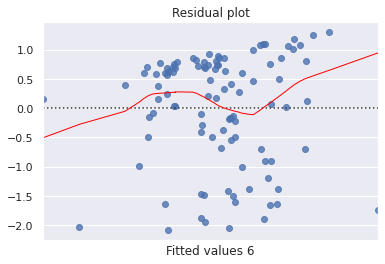

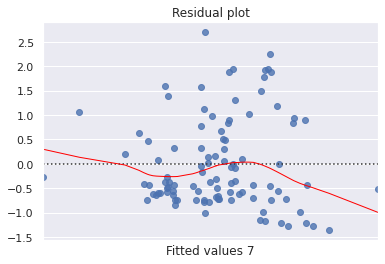

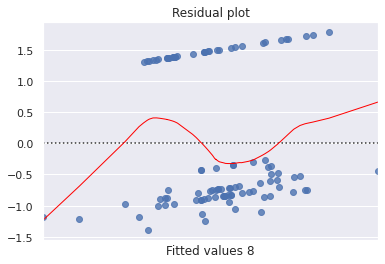

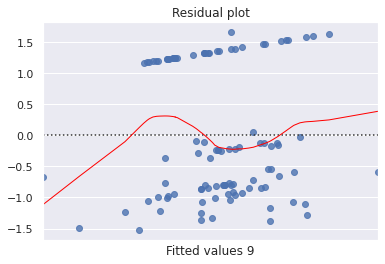

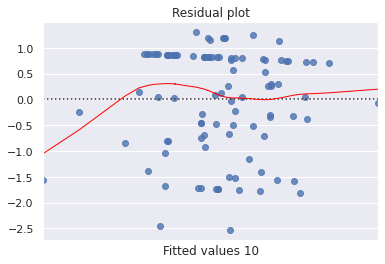

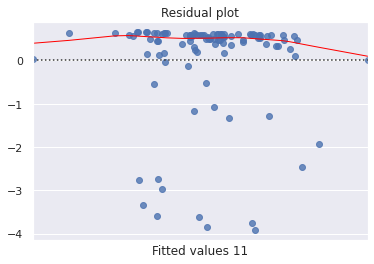

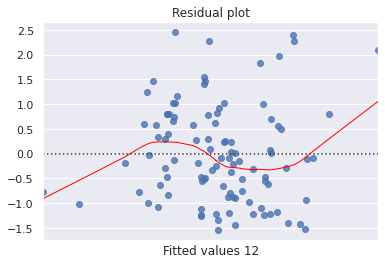

In [174]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))


residual_plot(y_pred, y_test, X_test)